In [6]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import warnings
warnings.simplefilter("ignore")

In [7]:
data = pd.read_csv("/kaggle/input/thyroid-disease-data-set/hypothyroid.csv")

In [8]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [9]:
number = ["age","TSH","T3","TT4","T4U","FTI"]

In [10]:
data.replace("?",np.nan,inplace=True)

In [11]:
for i in data.columns:
    if i in number:
        data[i] = data[i].astype(float)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [13]:
data.isna().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

data["TBG"] has more null values, so that column is dropped

In [14]:
del data["TBG"]

In [15]:
data.isna().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
referral source                0
binaryClass                    0
dtype: int64

There are some NULL values to be dropped

In [16]:
data.dropna(inplace=True)

In [17]:
data.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
referral source              0
binaryClass                  0
dtype: int64

In [18]:
data.tail()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
3766,19.0,F,f,f,f,f,f,f,f,f,...,2.7,t,108.0,t,1.11,t,97.0,f,other,N
3768,68.0,F,f,f,f,f,f,f,f,f,...,2.1,t,124.0,t,1.08,t,114.0,f,SVI,P
3769,74.0,F,f,f,f,f,f,f,f,f,...,1.8,t,112.0,t,1.07,t,105.0,f,other,P
3770,72.0,M,f,f,f,f,f,f,f,f,...,2.0,t,82.0,t,0.94,t,87.0,f,SVI,P
3771,64.0,F,f,f,f,f,f,f,f,f,...,2.2,t,99.0,t,1.07,t,92.0,f,other,P


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2643 non-null   float64
 1   sex                        2643 non-null   object 
 2   on thyroxine               2643 non-null   object 
 3   query on thyroxine         2643 non-null   object 
 4   on antithyroid medication  2643 non-null   object 
 5   sick                       2643 non-null   object 
 6   pregnant                   2643 non-null   object 
 7   thyroid surgery            2643 non-null   object 
 8   I131 treatment             2643 non-null   object 
 9   query hypothyroid          2643 non-null   object 
 10  query hyperthyroid         2643 non-null   object 
 11  lithium                    2643 non-null   object 
 12  goitre                     2643 non-null   object 
 13  tumor                      2643 non-null   objec

In [20]:
labels = {}

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
for i in data.columns:
    if np.dtype(data[i])=="O":
        data[i] = le.fit_transform(data[i])
        labels[i] = le.classes_

In [23]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41.0,0,0,0,0,0,0,0,0,0,...,2.5,0,125.0,0,1.14,0,109.0,0,1,1
4,70.0,0,0,0,0,0,0,0,0,0,...,1.2,0,61.0,0,0.87,0,70.0,0,3,1
7,80.0,0,0,0,0,0,0,0,0,0,...,0.6,0,80.0,0,0.70,0,115.0,0,3,1
8,66.0,0,0,0,0,0,0,0,0,0,...,2.2,0,123.0,0,0.93,0,132.0,0,3,1
9,68.0,1,0,0,0,0,0,0,0,0,...,1.6,0,83.0,0,0.89,0,93.0,0,3,1


In [24]:
labels

{'sex': array(['F', 'M'], dtype=object),
 'on thyroxine': array(['f', 't'], dtype=object),
 'query on thyroxine': array(['f', 't'], dtype=object),
 'on antithyroid medication': array(['f', 't'], dtype=object),
 'sick': array(['f', 't'], dtype=object),
 'pregnant': array(['f', 't'], dtype=object),
 'thyroid surgery': array(['f', 't'], dtype=object),
 'I131 treatment': array(['f', 't'], dtype=object),
 'query hypothyroid': array(['f', 't'], dtype=object),
 'query hyperthyroid': array(['f', 't'], dtype=object),
 'lithium': array(['f', 't'], dtype=object),
 'goitre': array(['f', 't'], dtype=object),
 'tumor': array(['f', 't'], dtype=object),
 'hypopituitary': array(['f', 't'], dtype=object),
 'psych': array(['f', 't'], dtype=object),
 'TSH measured': array(['t'], dtype=object),
 'T3 measured': array(['t'], dtype=object),
 'TT4 measured': array(['t'], dtype=object),
 'T4U measured': array(['t'], dtype=object),
 'FTI measured': array(['t'], dtype=object),
 'TBG measured': array(['f'], dtype=

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2643 non-null   float64
 1   sex                        2643 non-null   int64  
 2   on thyroxine               2643 non-null   int64  
 3   query on thyroxine         2643 non-null   int64  
 4   on antithyroid medication  2643 non-null   int64  
 5   sick                       2643 non-null   int64  
 6   pregnant                   2643 non-null   int64  
 7   thyroid surgery            2643 non-null   int64  
 8   I131 treatment             2643 non-null   int64  
 9   query hypothyroid          2643 non-null   int64  
 10  query hyperthyroid         2643 non-null   int64  
 11  lithium                    2643 non-null   int64  
 12  goitre                     2643 non-null   int64  
 13  tumor                      2643 non-null   int64

In [26]:
import seaborn as sns

<AxesSubplot:>

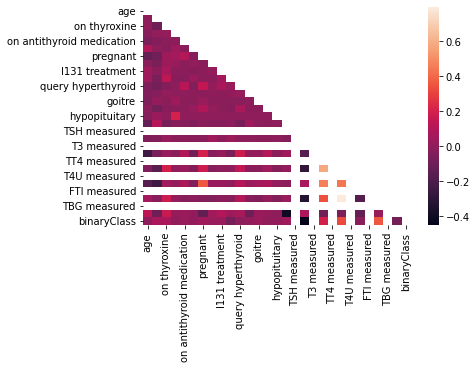

In [27]:
sns.heatmap(data.corr(),mask = np.triu(data.corr()))

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.drop("binaryClass",axis=1), data["binaryClass"])

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain,Ytrain)
ypred = lr.predict(Xtest)
accuracy_score(Ytest,ypred)
a = lr.decision_function(Xtest)

In [100]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(Xtrain,Ytrain)
ypred = rfc.predict(Xtest)
accuracy_score(Ytest,ypred)

0.9939485627836612

In [101]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain,Ytrain)
ypred = dtc.predict(Xtest)
accuracy_score(Ytest,ypred)

0.9969742813918305

In [103]:
confusion_matrix(Ytest,ypred)

array([[ 49,   1],
       [  1, 610]])

In [105]:
print(classification_report(Ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       1.00      1.00      1.00       611

    accuracy                           1.00       661
   macro avg       0.99      0.99      0.99       661
weighted avg       1.00      1.00      1.00       661



<h1 style = "color:green" >Decision Tree generates more Accuracy <h1>